In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO

In [3]:
data = pd.read_csv('ethSentimet.csv')
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,2.566667,-0.297346,0.636111,299.252991,0
1,2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,2.600000,-0.297761,0.636111,316.716003,1
2,2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,2.666667,-0.325542,0.652778,337.631012,1
3,2017-11-14 00:00:00+00:00,316.763000,340.177002,316.763000,337.631012,1069680000,2.700000,-0.326967,0.652778,332.394012,0
4,2017-11-17 00:00:00+00:00,330.166992,334.963989,327.523010,332.394012,621732992,2.700000,-0.352462,0.669444,347.612000,1
...,...,...,...,...,...,...,...,...,...,...,...
685,2024-05-24 00:00:00+00:00,3776.992432,3825.122559,3631.990234,3726.934570,22257061429,1.600000,-0.340325,0.664444,3749.236572,1
686,2024-05-25 00:00:00+00:00,3726.975586,3776.006592,3710.528320,3749.236572,10000027764,1.700000,-0.291719,0.639444,3825.897461,1
687,2024-05-26 00:00:00+00:00,3749.179932,3879.470703,3732.022949,3825.897461,14650794791,1.700000,-0.234965,0.606111,3892.006836,1
688,2024-05-27 00:00:00+00:00,3826.127197,3973.556396,3821.930420,3892.006836,18949181813,1.666667,-0.265106,0.622778,3746.849609,0


In [4]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.4057971014492754
Confusion Matrix:
[[21 46]
 [36 35]]


In [10]:
import pandas as pd

# Read the CSV file
data_from_eth = pd.read_csv("eth.csv")

# Get the last row
last_row_eth = data_from_eth.iloc[-1]

print("Last row from eth.csv:")
print(last_row_eth)

Last row from eth.csv:
Date            2024-06-03 00:00:00+00:00
Open                          3779.296143
High                          3834.714111
Low                           3760.921387
Close                         3827.103027
Volume                        11594141696
Dividends                             0.0
Stock Splits                          0.0
Name: 2398, dtype: object


In [11]:
import pandas as pd

# Read the CSV file
sentiment_from_eth = pd.read_csv("ethereum_sentiment.csv")

# Get the last row
last_row_eth_sentiment = sentiment_from_eth.iloc[-1]

print("Last row from ethereum_sentiment.csv:")
print(last_row_eth_sentiment)

Last row from ethereum_sentiment.csv:
Unnamed: 0       2024-05-30
edit_count         1.666667
sentiment         -0.256724
neg_sentiment      0.622778
Name: 1141, dtype: object


In [12]:
# Function to fetch the latest data for Ethereum
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_eth['Open'],
        "high": last_row_eth['High'],
        "low": last_row_eth['Low'],
        "close": last_row_eth['Close'],
        "volume": last_row_eth['Volume'],
        "edit_count": last_row_eth_sentiment['edit_count'],
        "sentiment": last_row_eth_sentiment['sentiment'],
        "neg_sentiment": last_row_eth_sentiment['neg_sentiment']
    }
    return latest_data


In [13]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,3779.296143,3834.714111,3760.921387,3827.103027,11594141696,1.666667,-0.256724,0.622778


In [14]:
latest_probabilities = model.predict_proba(latest_df)

c:\Users\SUBRAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of Bitcoin Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

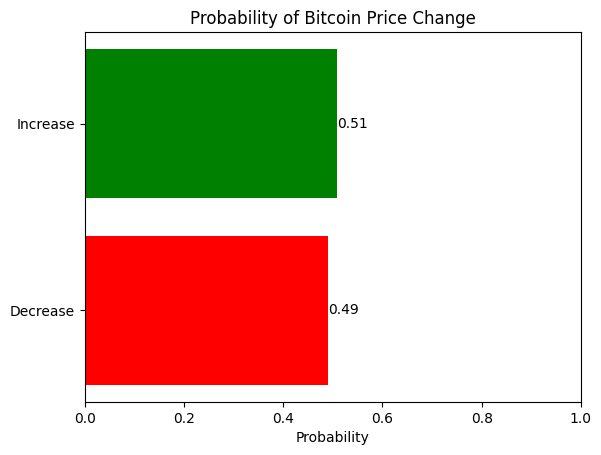

In [16]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [17]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.49
Probability of price increase: 0.51
